### Course: Bayesian Filtering and Smoothing.
### Exercise round: 1
### Student's name: Diego Alejandro Agudelo España.

## Exercise 1 (Linear Least Squares Estimation).

Assume that we have obtained $T$ measurement pairs $(x_k,y_k)$ from the linear regression model

\begin{align}
	y_k = \theta_1 x_k + \theta_2, \qquad k = 1, 2, \cdots, T.
\end{align}

The purpose is now to derive estimates of the parameters $\theta_1$ and $\theta_2$ such that the following error is minimized (least squares estimate):

\begin{align}
	E(\theta_1,\theta_2) = \sum_{k=1}^{T} \begin{pmatrix} y_k - \theta_1 x_k - \theta_2 \end{pmatrix}^2.
\end{align}

1. Define $\mathbf{y} = \begin{bmatrix}y_1 & \cdots & y_T\end{bmatrix}^\top$ and $\mathbf{\theta} = \begin{bmatrix}\theta_1 & \theta_2\end{bmatrix}^\top$. Show that the set of Equations of the regression model can be written in matrix form as $\mathbf{y} = \mathbf{X} \mathbf{\theta}$ with a suitably defined matrix $\mathbf{X}$.
2. Write the least squares error function in matrix form in terms of $\mathbf{y}$, $\mathbf{X}$ and $\mathbf{\theta}$.
3. Compute the gradient of the matrix form error function and solve the least squares estimate of the parameter $\mathbf{\theta}$ by finding the point where the gradient is zero.

## Solution Exercise 1.

### 1.

if $\mathbf{X}$ is defined as follows

$$
\mathbf{X} = \begin{bmatrix}
    x_1 & 1 \\ 
    x_2 & 1 \\ 
    \vdots & \vdots \\
    x_k & 1 \\
    \vdots & \vdots \\
    x_T & 1 \\
\end{bmatrix}
$$

Then the regression model can written as:

$$
\begin{bmatrix}
    y_1 \\ 
    y_2 \\ 
    \vdots \\
    y_k \\
    \vdots \\
    y_T \\
\end{bmatrix}
 = 
\begin{bmatrix}
    x_1 & 1 \\ 
    x_2 & 1 \\ 
    \vdots & \vdots \\
    x_k & 1 \\
    \vdots & \vdots \\
    x_T & 1 \\
\end{bmatrix}
\begin{bmatrix}
    \theta_1  \\
    \theta_2
\end{bmatrix}
$$

Or equivalently:

$$ \mathbf{y} = \mathbf{X} \mathbf{\theta} $$

### 2.

The error function can be written in terms of $y$, $\mathbf{X}$ and $\mathbf{\theta}$ as:

$$ E(\mathbf{\theta}) = (\mathbf{y} - \mathbf{X} \mathbf{\theta})^\top (\mathbf{y} - \mathbf{X} \mathbf{\theta}) $$

### 3.

Expanding the form of error function we have:
    
$$ 
\begin{align}
E(\mathbf{\theta}) & = \mathcal{y}^\top \mathcal{y} - \mathcal{y}^\top \mathbf{X} \mathbf{\theta} - (\mathbf{X} \mathbf{\theta})^\top y + (\mathbf{X} \mathbf{\theta})^\top \mathbf{X} \mathbf{\theta} \\ 
                   & = \mathcal{y}^\top \mathcal{y} - 2 \mathcal{y}^\top \mathbf{X} \mathbf{\theta}  + \mathbf{\theta}^\top \mathbf{X}^\top \mathbf{X} \mathbf{\theta}
\end{align}
$$

Taking the derivative of $E(\mathbf{\theta})$ with respect to $\mathbf{\theta}$ we have


$$
 \frac{\partial E}{\partial \mathbf{\theta}} = -2 \mathbf{X}^\top y + 2 \mathbf{X}^\top \mathbf{X} \mathbf{\theta}
$$


By equating to $0$ the gradient and rearranging:

$$
 \mathbf{X}^\top \mathbf{X} \mathbf{\theta} = \mathbf{X}^\top y 
$$

Therefore the least squares estimate of $\mathbf{\theta}$ is given by:

$$ \mathbf{\theta} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top y $$

## Exercise 3 (Kalman filtering with the EKF/UKF Toolbox).

1. Download and install the EKF/UKF toolbox to some Matlab computer from the web page: 

    ```
            http://becs.aalto.fi/en/research/bayes/ekfukf/
    ```

    Run the following demonstrations:

    ```
            demos/kf_sine_demo/kf_sine_demo.m
            demos/kf_cwpa_demo/kf_cwpa_demo.m
    ```

    After running them, read the contents of these files and try to understand how they have been implemented. Also read the documentations of functions ```kf_predict``` and ```kf_update``` (type e.g. ```help kf_predict``` in Matlab).
    
2. Consider the following state space model:

 $$\begin{align} \mathbf{x_k} &= \begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix} \mathbf{x_{k-1}} + \mathbf{w_{k-1}} \\ \mathbf{y_k}  &= \begin{bmatrix} 1 & 0 \end{bmatrix} \mathbf{x_{k-1}} + v_{k} \end{align}$$

    where $x_k = \begin{bmatrix}x_k & \dot{x}_k \end{bmatrix}^\top$ is the state, $y_k$ is the measurement, and $\mathbf{w_k} \sim \mathcal{N}(\mathbf{0}, \text{diag}(\frac{1}{10^2}, 1))$ and $v_k \sim \mathcal{N}(0, 10^2)$ are white Gaussian noise processes.

    Simulate a 100 step state sequence from the model and plot the signal $x_k$, signal derivative $\dot{x}_k$ and the simulated measurements $y_k$. Start from an initial state drawn from a zero-mean 2d-Gaussian distribution with identity covariance.
    
3. Use the Kalman filter for computing the state estimates $\mathbf{m_k}$ using the following kind of Matlab-code:
    
    ```
    m = [0;0]; % Initial mean
    P = eye(2); % Initial covariance
    for k = 1:100
        [m,P] = kf_predict(m,P,A,Q);
        [m,P] = kf_update(m,P,y(k),H,R);
        % Store the estimate m of state x_k here
    end
    ```
 
4. Plot the state estimates $\mathbf{m_k}$, the true states $\mathbf{x_k}$ and measurements $y_k$. Compute the RMSE (root mean square error) of using the first components of vectors $\mathbf{m_k}$ as the estimates of first components of states $\mathbf{x_k}$. Also compute the RMSE error that we would have if we used the measurements as the estimates.

### Solution Exercise 3.

In [ ]:
%%script octave
randn('state',12);

% rmse function
rmse = @(AA,BB) sqrt(sum(sum((AA - BB) .* (AA - BB))));


A = [1,1;0,1];
H = [1,0];
steps = 100;
T = 1:steps;
x = [randn; randn];

Q = [1./100, 0; 0, 1.];
R = 100;


XX = zeros(2, steps);
YY = zeros(1, steps);
for i = 1:steps
    x = A * x + mvnrnd(zeros(2, 1), Q, 1)';
    y = H * x + sqrt(R) *randn;
    XX(:, i) = x;
    YY(i) = y;
end

% plot(T, XX(1, :), T, YY);

m = [0;0]; % Initial mean
P = eye(2); % Initial covariance
MM = zeros(2, steps);
for k = 1:100
 [m,P] = kf_predict(m,P,A,Q);
 [m,P] = kf_update(m,P,YY(k),H,R);
 % Store the estimate m of state x_k here
 MM(:, k) = m;
end


plot(T, XX(1,:), '--', T, MM(1,:), '-', T, YY(1, :), 'o');
legend('True signal','Estimated signal','Measurements');
saveas(gcf,'R1_KalmanFilter.png')

rmse_baseline = rmse(XX(1,:), YY(1,:))
rmse_kalman = rmse(XX(1,:), MM(1,:))

In [2]:
from IPython.display import Image

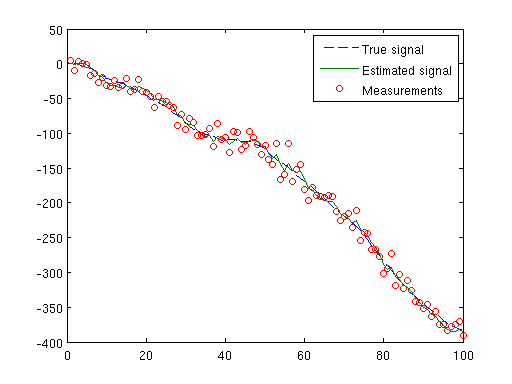

In [4]:
Image(filename='R1_KalmanFilter.png') 

Method | RMSE
--- | --- 
Baseline Solution (measurements as estimates) | 108.9168
KF Solution | 47.7138